In [8]:
%load_ext autoreload
%autoreload 2

In [106]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')
data_path=r"epl_23-f.csv"
import preprocessing
tx,ty,vx,vy,tsx,tsy=preprocessing.process(data_path,dt_features=False)
tx.columns

Index(['hometeam', 'awayteam', 'ftr', 'hthg', 'htag', 'htr', 'hs', 'as', 'hst',
       'ast', 'hc', 'ac', 'hf', 'af', 'hy', 'ay', 'hr', 'ar', 'week',
       'dayofseason', 'day'],
      dtype='object')

In [107]:
tx.dtypes

hometeam        object
awayteam        object
ftr            float64
hthg           float64
htag           float64
htr            float64
hs             float64
as             float64
hst            float64
ast            float64
hc             float64
ac             float64
hf             float64
af             float64
hy             float64
ay             float64
hr             float64
ar             float64
week           float64
dayofseason    float64
day              int64
dtype: object

In [108]:
from sklearn.feature_selection import mutual_info_regression
mi=mutual_info_regression(tx,ty['fthg'])
mi2=mutual_info_regression(tx,ty['ftag'])

ValueError: could not convert string to float: 'Chelsea'

<AxesSubplot:xlabel='mi score'>

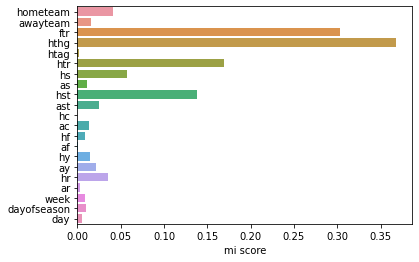

In [ ]:
import seaborn as sns
mi=pd.DataFrame(mi,index=tx.columns,columns=['mi score'])
sns.barplot(mi['mi score'],mi.index)

<AxesSubplot:xlabel='mi score'>

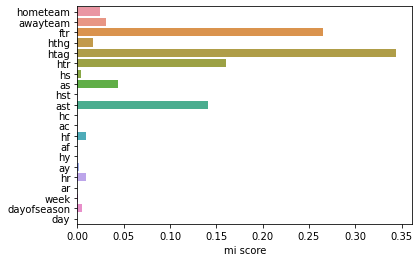

In [ ]:
import seaborn as sns
mi2=pd.DataFrame(mi2,index=tx.columns,columns=['mi score'])
sns.barplot(mi2['mi score'],mi2.index)

In [ ]:
# import features
# rolling_hs=features.rolling_features(data=tx,feature='hs',home=True)
# rolling_hs

In [ ]:
tx

,hometeam,awayteam,ftr,hthg,htag,htr,hs,as,hst,ast,...,ac,hf,af,hy,ay,hr,ar,week,dayofseason,day
0,37.0,28.0,0.0,1.0,0.0,0.0,13.0,14.0,5.0,3.0,...,1.0,4.0,8.0,0.0,2.0,0.0,0.0,16.0,110.0,3
1,1.0,10.0,1.0,0.0,0.0,1.0,27.0,6.0,7.0,4.0,...,1.0,17.0,19.0,1.0,1.0,0.0,0.0,15.0,97.0,4
2,28.0,35.0,1.0,0.0,0.0,1.0,9.0,7.0,3.0,3.0,...,8.0,14.0,17.0,2.0,4.0,0.0,0.0,26.0,177.0,7
3,28.0,9.0,1.0,0.0,0.0,1.0,11.0,10.0,2.0,3.0,...,6.0,11.0,10.0,2.0,2.0,0.0,0.0,21.0,142.0,6
4,24.0,26.0,1.0,0.0,0.0,1.0,19.0,6.0,5.0,1.0,...,3.0,7.0,13.0,0.0,2.0,0.0,0.0,10.0,65.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962,30.0,23.0,2.0,0.0,1.0,2.0,12.0,7.0,7.0,3.0,...,4.0,12.0,14.0,5.0,1.0,0.0,0.0,16.0,106.0,6
5963,43.0,38.0,2.0,0.0,1.0,2.0,18.0,14.0,10.0,12.0,...,3.0,6.0,11.0,1.0,1.0,1.0,0.0,40.0,274.0,6
5964,25.0,23.0,2.0,1.0,1.0,1.0,16.0,7.0,5.0,7.0,...,4.0,13.0,8.0,1.0,3.0,0.0,0.0,3.0,16.0,7
5965,13.0,3.0,2.0,0.0,0.0,1.0,16.0,6.0,9.0,5.0,...,2.0,11.0,12.0,2.0,1.0,0.0,0.0,28.0,190.0,6


In [ ]:
import features
dd=features.rolling_features(data=tx,features=['hs','hst','hc','hf','hy','hr'],home=True)


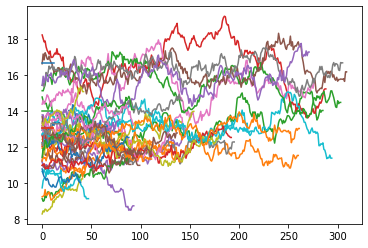

In [ ]:
import matplotlib.pyplot as plt
for i in tx.hometeam.unique():
    plt.plot(range(len(rolling_features['hs_rolling'][i])),rolling_features['hs_rolling'][i])
# plt.plot(rolling_features['hs_rolling'])

In [ ]:
home_data=tx[['hs','hst','hc','hf','hy','hr']][tx.hometeam=='Arsenal']
away_data=tx[['as','ast','ac','af','ay','ar']][tx.awayteam=='Arsenal']

In [ ]:
aa=tx[['hs','hst','hc','hf','hy','hr']][]




,hs,hst,hc,hf,hy,hr


In [111]:
tx.loc[(tx.hometeam=='Arsenal')&(tx.awayteam=='Liverpool')].index

Int64Index([ 3791,  9764,  7013,  3420,  8911,  5804,  7618,  6038, 10717,
             6947, 11086,  4272, 10398,  7854,  4711,  5008,  5221],
           dtype='int64')

In [123]:
for team in tx.hometeam.unique():
    home_data=tx[['hs','hst','hc','hf','hy','hr']][tx.hometeam==team]
    away_data=tx[['as','ast','ac','af','ay','ar']][tx.awayteam==team]
    home_data.columns=['s','st','c','f','y','r']
    away_data.columns=['s','st','c','f','y','r']
    team_data=pd.concat([home_data,away_data],axis=0)
    for feature in team_data.columns:
        name=feature+'_rolling'
        rolling_features=pd.DataFrame()
        rolling_features[name]=team_data[feature].rolling(window=38,center=True,min_periods=20).mean().shift(-1).fillna(method='ffill')
        
        rolling_features.sort_index(inplace=True)
        rolling[name]=rolling_features[name]
        
        

In [157]:
a=tx[['hs','hf']]
b=tx[['as','af']]

a.columns=['a','b']
b.columns=['a','b']
# pd.join([tx[['hs','hf']],tx[['as','af']]],axis=0)



In [158]:
a

,a,b
10496,20.0,5.0
9517,9.0,15.0
9572,13.0,8.0
5889,11.0,14.0
6868,10.0,15.0
...,...,...
4972,11.0,19.0
8715,16.0,9.0
3520,8.0,9.0
4468,8.0,19.0


In [163]:
pd.concat([a,b],axis=0)

,a,b
10496,20.0,5.0
9517,9.0,15.0
9572,13.0,8.0
5889,11.0,14.0
6868,10.0,15.0
...,...,...
4972,11.0,14.0
8715,9.0,5.0
3520,10.0,16.0
4468,11.0,13.0


In [4]:
from logging import warning
import warnings
warnings.simplefilter('ignore')
data_path= r"epl_23-f.csv"
from preprocessing import process
data=process(data_path,dt_features=False)
data.select_dtypes(include=['float64']).columns

floater=data.select_dtypes(include=['float64']).columns
integ=data.select_dtypes(include=['int64']).columns
obj=data.select_dtypes(include=['object']).columns

print(f'float{floater},int{integ},obj{obj}')

print(data.columns)


floatIndex(['fthg', 'ftag', 'hthg', 'htag', 'hs', 'as', 'hst', 'ast', 'hc', 'ac',
       'hf', 'af', 'hy', 'ay', 'hr', 'ar'],
      dtype='object'),intIndex(['week', 'dayofseason', 'day'], dtype='object'),objIndex(['season', 'datetime', 'hometeam', 'awayteam', 'ftr', 'htr', 'referee',
       'date_dummy'],
      dtype='object')
Index(['season', 'datetime', 'hometeam', 'awayteam', 'fthg', 'ftag', 'ftr',
       'hthg', 'htag', 'htr', 'referee', 'hs', 'as', 'hst', 'ast', 'hc', 'ac',
       'hf', 'af', 'hy', 'ay', 'hr', 'ar', 'week', 'dayofseason', 'date_dummy',
       'day'],
      dtype='object')


In [14]:
cols=list(data.columns)
cols.where('hst')

AttributeError: 'list' object has no attribute 'where'

In [78]:
from turtle import home
import preprocessing
import numpy as np
import pandas as pd

class RollingFeatures:
    home_features=['season','datetime','date_dummy','hometeam','ftr','htr','hthg','fthg','hs','hst','hc','hf','hy','hr','referee','week','dayofseason','day']
    away_features=['season','datetime','date_dummy','awayteam','ftr','htr','htag','ftag','as','ast','ac','af','ay','ar','referee','week','dayofseason','day']
    general_features=['season','datetime','date_dummy','team','ftr','htr','htg','ftg','s','st','c','f','y','r','referee','week','dayofseason','day']
    def __init__(self,data_path):
        self.data_path=data_path
        self.data=preprocessing.process(self.data_path)

    def f_one(self):
        home_data=self.data[self.home_features]
        away_data=self.data[self.away_features]
        home_data.columns=self.general_features
        away_data.columns=self.general_features
        identification=pd.concat([pd.Series(np.ones(home_data.shape[0])),pd.Series(np.zeros(away_data.shape[0]))],axis=0)
        identification.reset_index(drop=True,inplace=True) #identifying home and away teams
        data=pd.concat([home_data,away_data],axis=0) #concatting home aand away 
        data.reset_index(drop=True,inplace=True)
        data['identification']=identification
        data.sort_values(['team','date_dummy'],ascending=True,inplace=True)
        data.reset_index(drop=True,inplace=True)
        return data
        
    def rolling_features(self,data,features):
        """function calculates the rolling mean of the features and returns a dataframe with the rolling mean of the features"""
        rolling_features=pd.DataFrame()
        for feature in features:
            name=feature+'_rol'
            blank_frame=pd.DataFrame()
            blank_frame[name]=data.groupby('team')[feature].rolling(window=38,center=True,min_periods=20).mean().shift(-1).fillna(method='ffill')
            blank_frame.index=blank_frame.index.get_level_values(1)
            rolling_features[name]=blank_frame[name]
        return rolling_features


    def f_two(self,rol_data):
        new_data=self.f_one()
        new_data=new_data.join(rol_data)
        new_data.drop(['htg','ftg','s','st','c','f','y','r'],axis=1,inplace=True)
        n_home_data=new_data[new_data.identification==1]
        n_away_data=new_data[new_data.identification==0]
        n_home_data.drop(['identification'],axis=1,inplace=True)
        n_away_data.drop(['identification'],axis=1,inplace=True)

        n_home_data.columns=list(n_home_data.columns)[:10]+['hthg','fthg','hs','hst','hc','hf','hy','hr']
        n_away_data.columns=list(n_away_data.columns)[:10]+['htag','ftag','as','ast','ac','af','ay','ar']
        n_home_data.rename({'team':'hometeam'},axis=1,inplace=True)
        n_away_data.rename({'team':'awayteam'},axis=1,inplace=True)
        n_home_data.sort_values(['datetime','week','dayofseason','day','ftr','htr','referee'],ascending=True,inplace=True)
        n_away_data.sort_values(['datetime','week','dayofseason','day','ftr','htr','referee'],ascending=True,inplace=True)

        n_home_data.reset_index(drop=True,inplace=True)
        n_away_data.reset_index(drop=True,inplace=True)
        final_data=n_home_data.join(n_away_data[['awayteam','htag','ftag','as','ast','ac','af','ay','ar']])
        return final_data
    

    def excecute(self):
        trans_data=self.f_one()
        rol_data=self.rolling_features(trans_data,features=['htg','ftg','s','st','c','f','y','r'])
        final_data=self.f_two(rol_data)
        return final_data



In [79]:
import warnings
warnings.simplefilter('ignore')
data_path= r"epl_23-f.csv"
final=RollingFeatures(data_path).excecute()


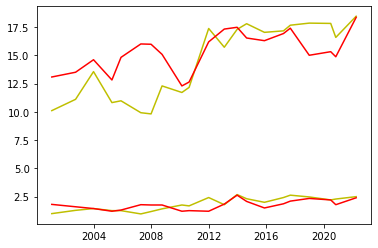

In [83]:
al=final.loc[(final.hometeam=='Man City')&(final.awayteam=='Liverpool')]
plt.plot(al.datetime,al.hs,'y')
plt.plot(al.datetime,al['as'],'r')
plt.plot(al.datetime,al.fthg,'y')
plt.plot(al.datetime,al['ftag'],'r')

In [318]:
#  a test to see everything is in place
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
h_ref=oe.fit_transform(n_home_data.referee.values.reshape(-1,1))
a_ref=oe.fit_transform(n_away_data.referee.values.reshape(-1,1))
(h_ref!=a_ref).sum()

0

In [338]:
al=final_data.loc[(final_data.hometeam=='Man City')&(final_data.awayteam=='Liverpool')]

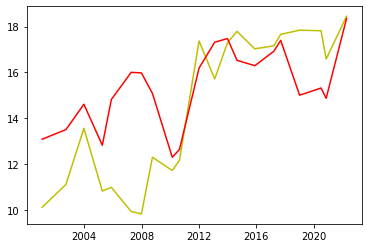

In [340]:
plt.plot(al.datetime,al.hs,'y')
plt.plot(al.datetime,al['as'],'r')

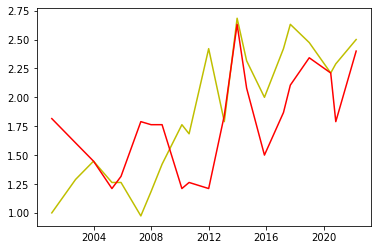

In [341]:
plt.plot(al.datetime,al.fthg,'y')
plt.plot(al.datetime,al['ftag'],'r')

In [342]:
al=final_data.loc[(final_data.awayteam=='Man City')&(final_data.hometeam=='Liverpool')]

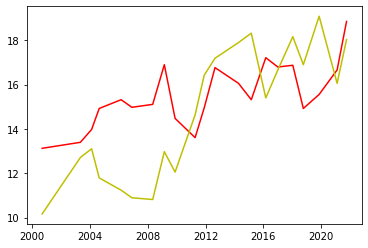

In [345]:
plt.plot(al.datetime,al.hs,'r')
plt.plot(al.datetime,al['as'],'y')

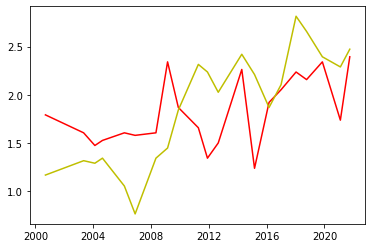

In [346]:
plt.plot(al.datetime,al.fthg,'r')
plt.plot(al.datetime,al['ftag'],'y')